# Modeling with Naive Bayes

#### We build multiple Naive Bayes Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [161]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [162]:
data_df = pd.read_csv("enumerated_test_comments.csv")

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [164]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=60, test_size=0.2,stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [165]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [166]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [167]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.7387387387387387

Classification Report:
               precision    recall  f1-score   support

           2       0.85      0.82      0.83        83
           3       0.45      0.56      0.50        25
           4       0.00      0.00      0.00         3

    accuracy                           0.74       111
   macro avg       0.43      0.46      0.44       111
weighted avg       0.74      0.74      0.74       111



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

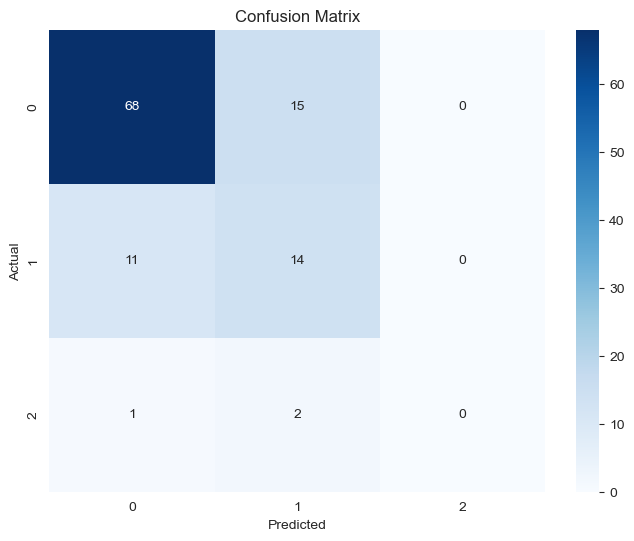

In [168]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [169]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2,stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [170]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

NameError: name 'y2_train_res' is not defined

In [171]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = nb.predict(X_test_vect)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [172]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

NameError: name 'y2_pred' is not defined

In [173]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y2_pred' is not defined

In [174]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [175]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [176]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [177]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.7477477477477478

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        74
           1       0.65      0.54      0.59        37

    accuracy                           0.75       111
   macro avg       0.72      0.70      0.70       111
weighted avg       0.74      0.75      0.74       111



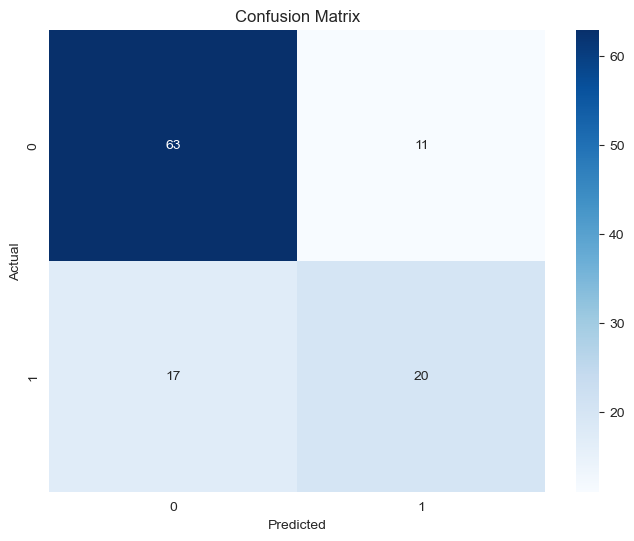

In [178]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [179]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [180]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [181]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [182]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.6576576576576577

Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.55      0.71        83
           3       0.41      0.96      0.58        25
           4       0.50      1.00      0.67         3

    accuracy                           0.66       111
   macro avg       0.63      0.84      0.65       111
weighted avg       0.84      0.66      0.68       111



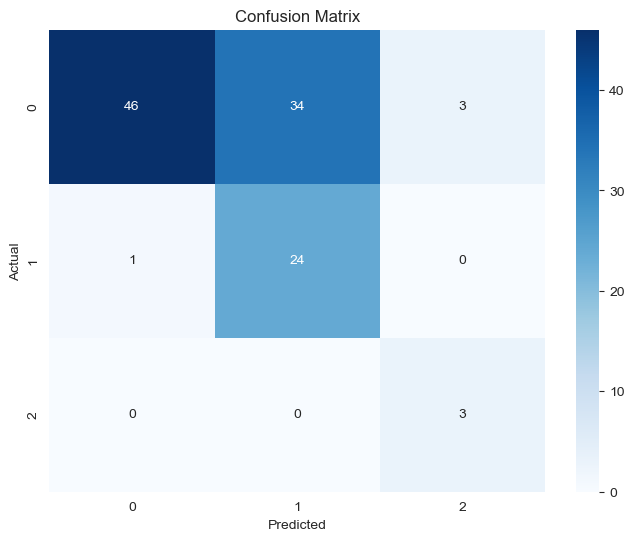

In [183]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [184]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2,stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [185]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

NameError: name 'y2_train_res' is not defined

In [186]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = nb.predict(X_test_vect)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [187]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

NameError: name 'y2_pred' is not defined

In [188]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y2_pred' is not defined

In [189]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2,stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [190]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [191]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [192]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.6846846846846847

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73        74
           1       0.52      0.76      0.62        37

    accuracy                           0.68       111
   macro avg       0.68      0.70      0.67       111
weighted avg       0.73      0.68      0.69       111



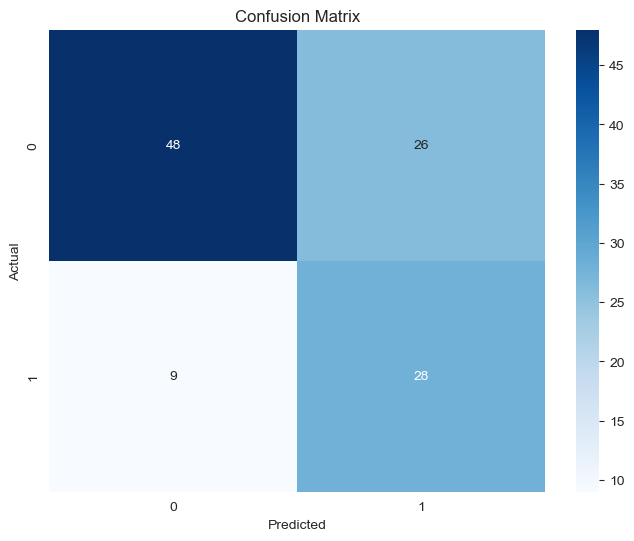

In [193]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()